In [1]:
#establishing environment
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import pickle
import scipy
from scipy.stats import pearsonr, ttest_rel, ttest_ind
from scipy import signal as sig
import matplotlib.patches as mpatches
import mat73
from scipy.io import loadmat, savemat
import mne
#conda install git+https://github.com/ieeg-portal/ieegpy.git # Install ieegpy toolbox directly from github
from ieeg.auth import Session
import random
from sklearn.cluster import KMeans
import os
os.chdir('E:/CNT/Interictal_Spike_Analysis/HUMAN/working_feat_extract_code/functions/')
from ied_functions import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_directory = 'F:\CNT_data\pt_database'
ptnames = ['HUP105','HUP106','HUP107','HUP111']

In [3]:
spike, brain_df, ids = load_ptall(ptnames[0],data_directory)
print(ids)

['HUP105', 'sub-RID0101']


In [4]:
pd.set_option('display.max_rows', 200)
display(brain_df)

,Unnamed: 0,name,x,y,z,index,label
0,0,LA1-CAR,77.7201,131.6120,51.0434,1006.0,left entorhinal
1,1,LA2-CAR,72.6069,131.7390,50.8534,0.0,EmptyLabel
2,2,LA3-CAR,67.4461,131.5880,51.6281,0.0,EmptyLabel
3,3,LA4-CAR,62.3330,131.7140,51.4380,0.0,EmptyLabel
4,4,LAT1-CAR,71.6354,146.6290,42.1220,1006.0,left entorhinal
5,5,LAT2-CAR,65.3583,138.5490,37.7429,1007.0,left fusiform
6,6,LAT3-CAR,57.3199,132.7050,35.9230,1009.0,left inferior temporal
7,7,LAT4-CAR,48.5460,127.4160,38.3569,0.0,EmptyLabel
8,8,LF1-CAR,41.5512,93.2913,116.5260,0.0,EmptyLabel
9,9,LF2-CAR,35.1300,96.7684,108.8310,1031.0,left supramarginal


In [5]:
#List of regions of interest that make up the mesial temporal lobe and the lateral temporal lobe. 

roiL_mesial = [' left entorhinal ', ' left parahippocampal ' , ' left hippocampus ', ' left amygdala ', ' left perirhinal ']
roiL_lateral = [' left inferior temporal ', ' left superior temporal ', ' left middle temporal ', ' left fusiform ']

roiR_mesial = [' right entorhinal ', ' right parahippocampal ', ' right hippocampus ', ' right amygdala ', ' right perirhinal ']
roiR_lateral = [' right inferior temporal ', ' right superior temporal ', ' right middle temporal ', ' right fusiform ']

roiLmesi_vals, roiLmesi_chnum, roiLmesi_idxch = value_basis(spike, brain_df, roiL_mesial)
roiLlat_vals, roiLlat_chnum, roiLlat_idxch = value_basis(spike, brain_df, roiL_lateral)
roiRmesi_vals, roiRmesi_chnum, roiRmesi_idxch = value_basis(spike, brain_df, roiR_mesial)
roiRlat_vals, roiRlat_chnum, roiRlat_idxch = value_basis(spike, brain_df, roiR_lateral)


In [6]:
# Validate that the labels are adding up.
print(roiRlat_idxch)
spike.chlabels[0][0][roiRlat_idxch]

[39, 40, 41, 42, 59, 48, 52]


array([[array(['RDNET1-CAR'], dtype='<U10')],
       [array(['RDNET2-CAR'], dtype='<U10')],
       [array(['RDNET3-CAR'], dtype='<U10')],
       [array(['RDNET4-CAR'], dtype='<U10')],
       [array(['RPT3-CAR'], dtype='<U8')],
       [array(['RF6-CAR'], dtype='<U7')],
       [array(['RH4-CAR'], dtype='<U7')]], dtype=object)

In [25]:
labels = spike.chlabels[0][0][roiRlat_idxch]
roi_labels = [x[0][0] for x in labels]


['RDNET1-CAR', 'RDNET2-CAR', 'RDNET3-CAR', 'RDNET4-CAR', 'RPT3-CAR', 'RF6-CAR', 'RH4-CAR']


In [12]:
print(np.shape(roiLmesi_vals))
print(np.shape(roiRmesi_vals))
print(np.shape(roiLlat_vals))
print(np.shape(roiRlat_vals))

(25, 2001, 61)
(42, 2001, 61)
(59, 2001, 61)
(51, 2001, 61)


In [42]:
roiLmesi_chnum #ch number
roiLlat_chnum 
roiRmesi_chnum
roiRlat_chnum

roiLmesi_idxch #indices
roiLlat_idxch
roiRmesi_idxch
roiRlat_idxch

def avgroi_wave(idx_roich, based_vals):
    avg_waveforms2 = []
    for i in range(len(idx_roich)):
        ch = []
        for spikes2 in based_vals:
            spike_t = np.transpose(spikes2)
            ch.append(np.abs(spike_t[idx_roich[i]]))
        avg_waveforms2.append(np.nanmean(ch, axis=0))
    return avg_waveforms2

def plot_avgroiwave(avg_waveform, roi,chnum):
    roi_ch = pd.DataFrame()
    for x in roi:
        roi_ch = roi_ch.append(brain_df[(brain_df['label'] == x)])

    roi_labels = np.array(roi_ch['label']) #converts DF to array
    fig, axs = plt.subplots(len(avg_waveform), 1, figsize=(7,15))
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.4)
    time = np.linspace(0,4,2001)
    for i in range(len(avg_waveform)):
        axs[i].plot(time, avg_waveform[i], 'k') #plot nerve data - unfiltered
        axs[i].set_ylabel("Voltage (millivolts)")
        axs[i].set_xlabel("Time (s)")
        axs[i].set_title("Average Waveform for Channel {} in {}".format(int(chnum[i]),roi_labels[i]))
    return fig

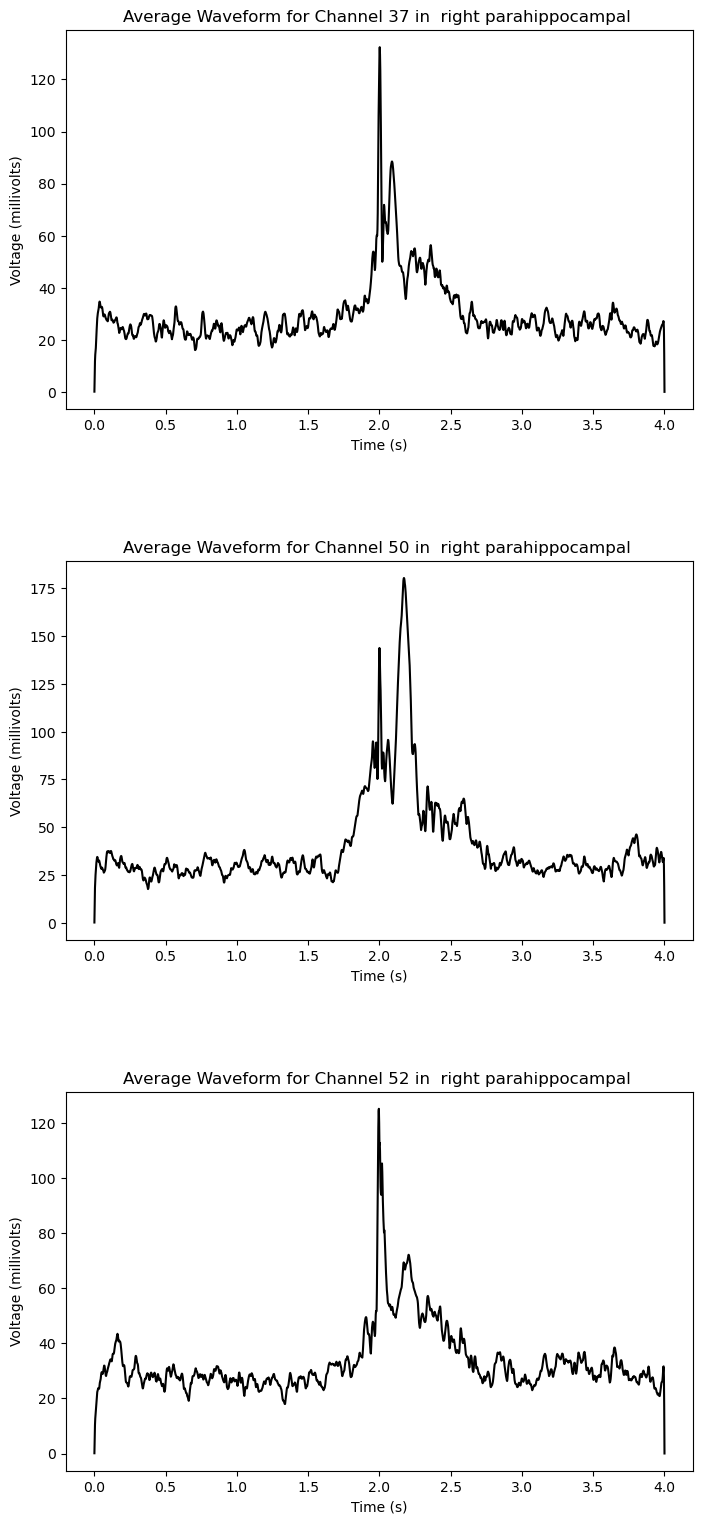

In [48]:
avgRmesi_waveforms = avgroi_wave(roiRmesi_idxch, roiRmesi_vals)
fig_Rmesi = plot_avgroiwave(avgRmesi_waveforms, roiR_mesial, roiRmesi_chnum)
plt.savefig("E:/CNT/Interictal_Spike_Analysis/HUMAN/working_feat_extract_code/spike figures/Rmesi_abs") #save as jpg


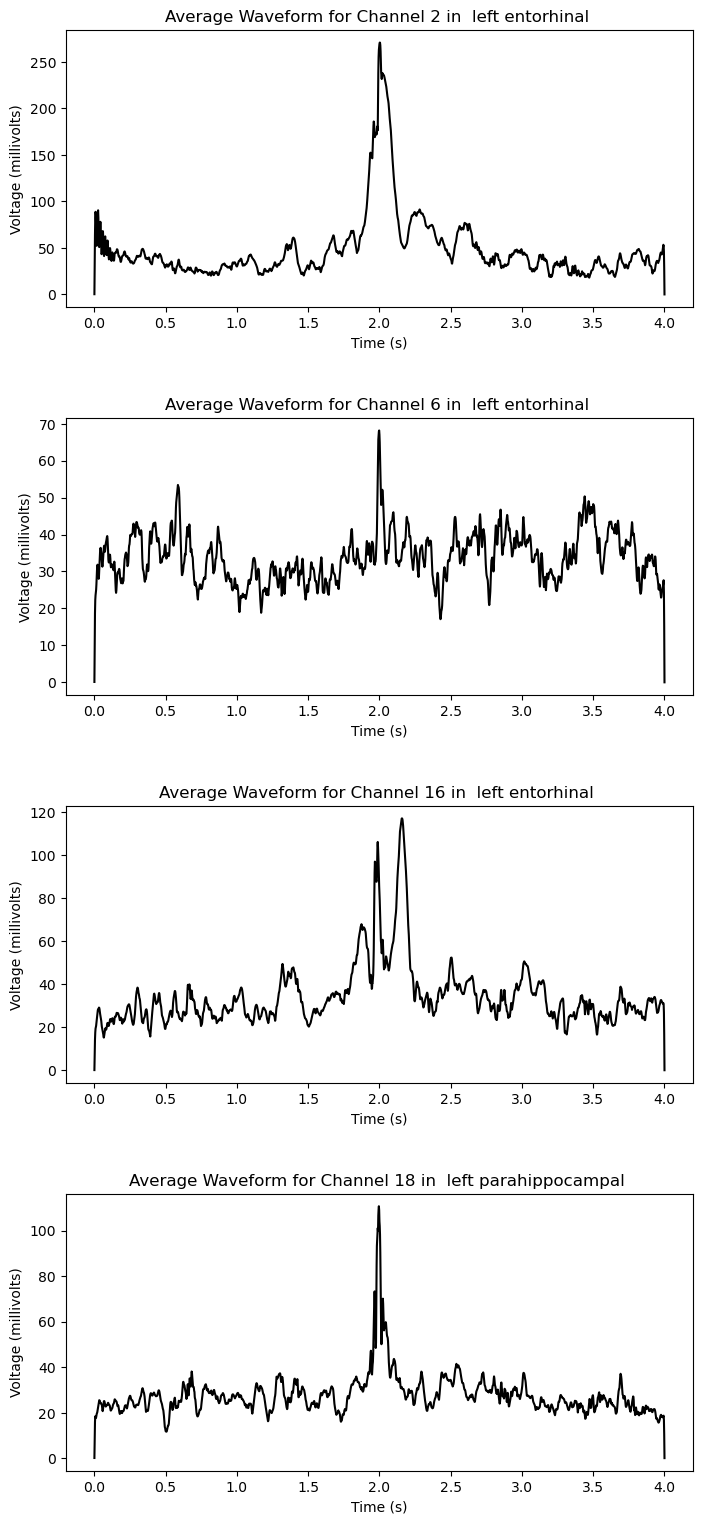

In [49]:
avgLmesi_waveforms = avgroi_wave(roiLmesi_idxch, roiLmesi_vals)
fig_Lmesi = plot_avgroiwave(avgLmesi_waveforms, roiL_mesial, roiLmesi_chnum)
plt.savefig("E:/CNT/Interictal_Spike_Analysis/HUMAN/working_feat_extract_code/spike figures/Lmesi_abs") #save as jpg


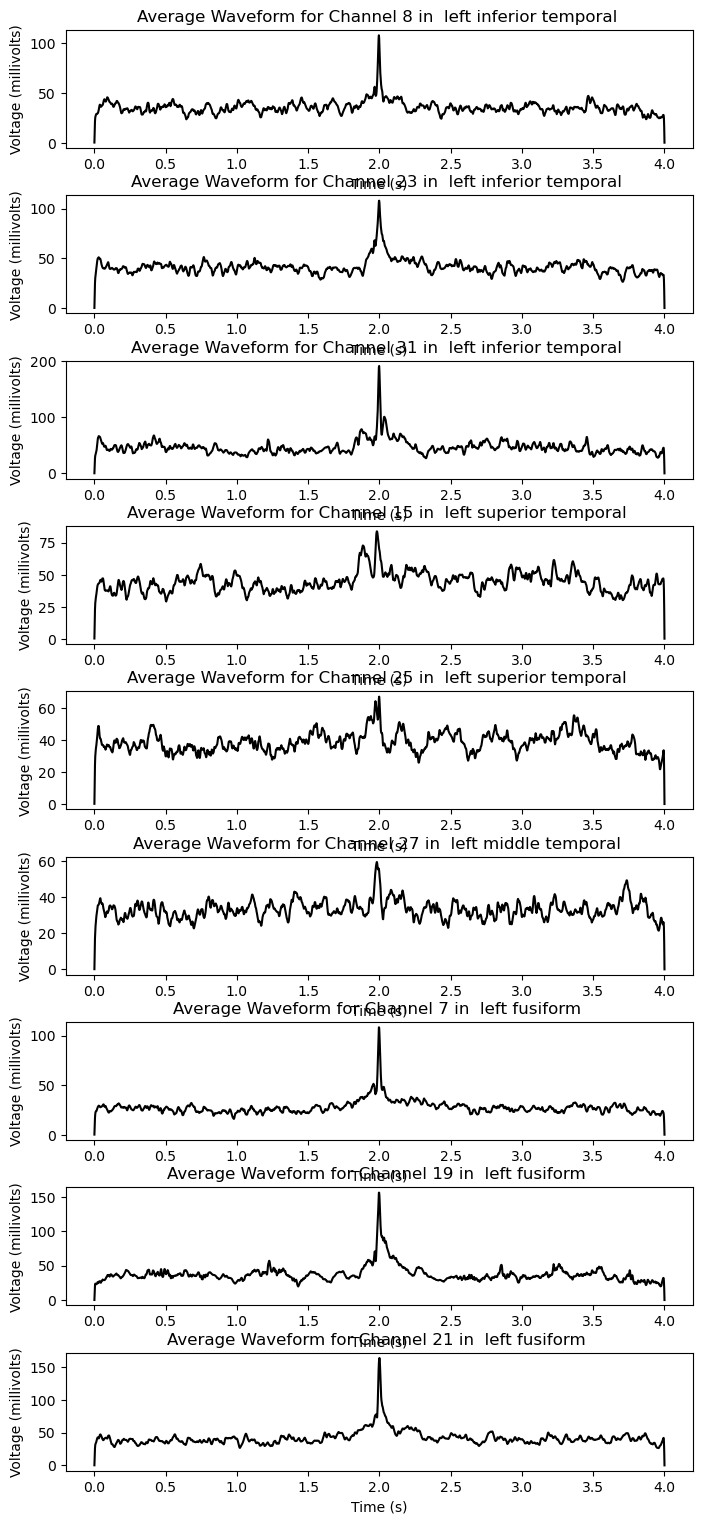

In [50]:
avgLlat_waveforms = avgroi_wave(roiLlat_idxch, roiLlat_vals)
fig_Llat = plot_avgroiwave(avgLlat_waveforms, roiL_lateral, roiLlat_chnum)
plt.savefig("E:/CNT/Interictal_Spike_Analysis/HUMAN/working_feat_extract_code/spike figures/Llat_abs") #save as jpg


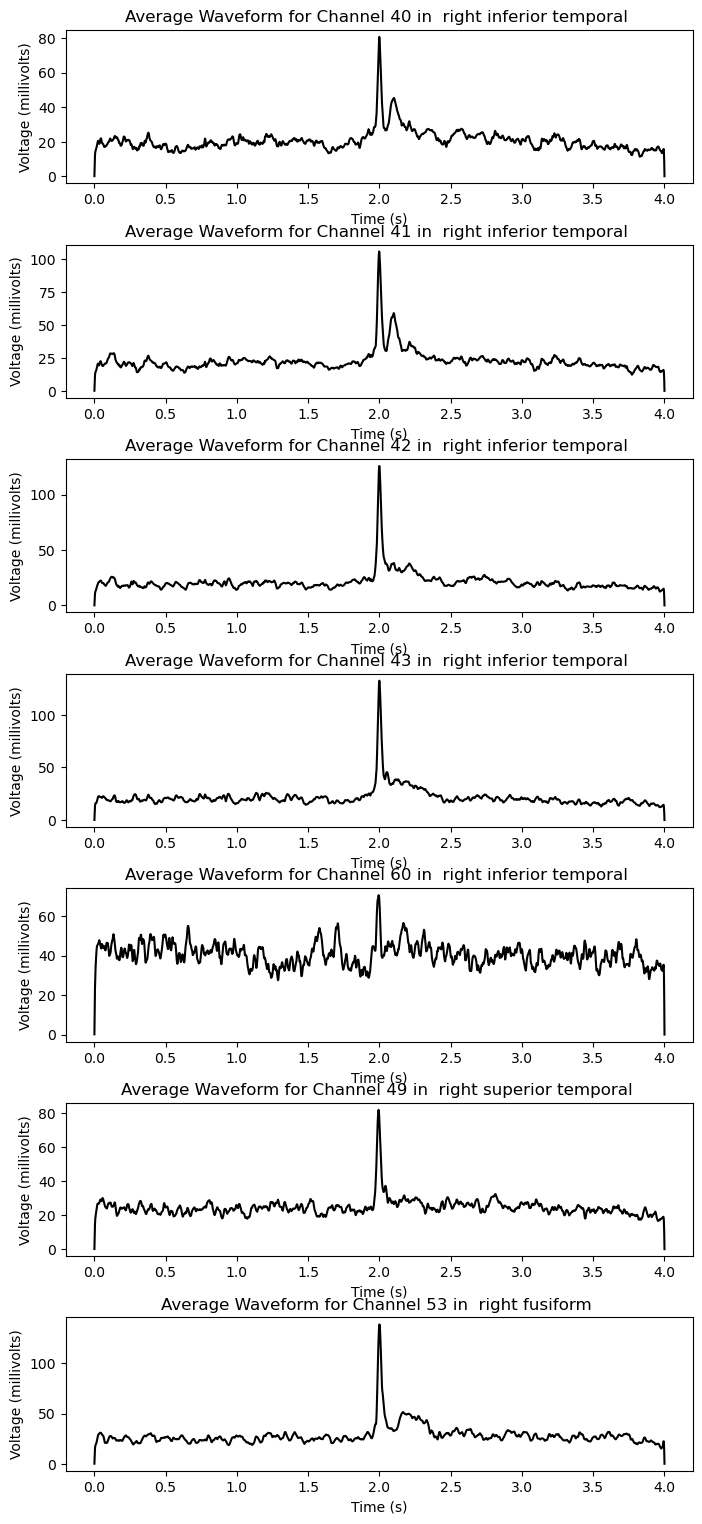

In [51]:
avgRlat_waveforms = avgroi_wave(roiRlat_idxch, roiRlat_vals)
fig_Rlat = plot_avgroiwave(avgRlat_waveforms, roiR_lateral, roiRlat_chnum)
plt.savefig("E:/CNT/Interictal_Spike_Analysis/HUMAN/working_feat_extract_code/spike figures/Rlat_abs") #save as jpg


In [73]:
# Now we will take the complete average of a region.

def totalavg_roiwave(idx_roich, based_vals):
    avg_waveform = []

    waveform = []
    all_waveforms = []
    for i in range(len(idx_roich)):
        for spikes2 in based_vals:
            spike_t = np.transpose(spikes2)
            waveform.append(np.abs(spike_t[idx_roich[i]]))
        all_waveforms.append(waveform)

    concat = [x[0] for x in all_waveforms]
    avg_waveform = np.mean(concat,axis=0)

    return avg_waveform

def plot_avgroiwave(avg_waveform, title_label):
    time = np.linspace(0,4,2001)
    fig = plt.figure(figsize = (6,6))
    fig.plot(time,avg_waveform,'k')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (millivolts)')
    plt.title('Average Waveform for {}'.format(title_label))
    plt.tight_layout()
    plt.show()
    return fig

#avgRmesi_waveforms = avgroi_wave(roiRmesi_idxch, roiRmesi_vals)


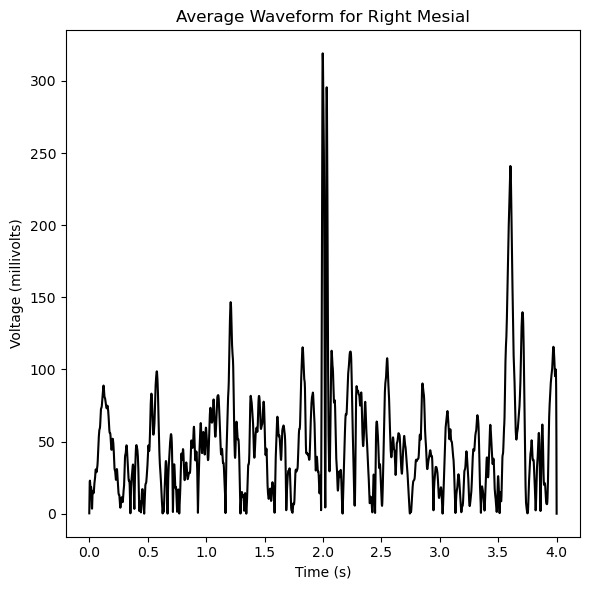

In [80]:
Rmesi_avgwave_abs = totalavg_roiwave(roiRmesi_idxch, roiRmesi_vals)
fig = plot_avgroiwave(Rmesi_avgwave_abs, 'Right Mesial')
fig.savefig("E:/CNT/Interictal_Spike_Analysis/HUMAN/working_feat_extract_code/spike figures/abs_avg_all/Rmesi_abs") #save as jpg


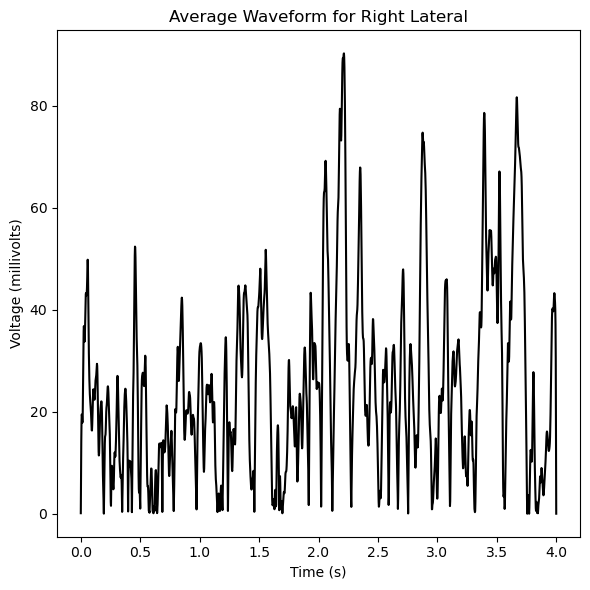

In [82]:
Rlat_avgwave_abs = totalavg_roiwave(roiRlat_idxch, roiRlat_vals)
fig = plot_avgroiwave(Rlat_avgwave_abs, 'Right Lateral')
fig.savefig("E:/CNT/Interictal_Spike_Analysis/HUMAN/working_feat_extract_code/spike figures/abs_avg_all/Rlateral_abs") #save as jpg


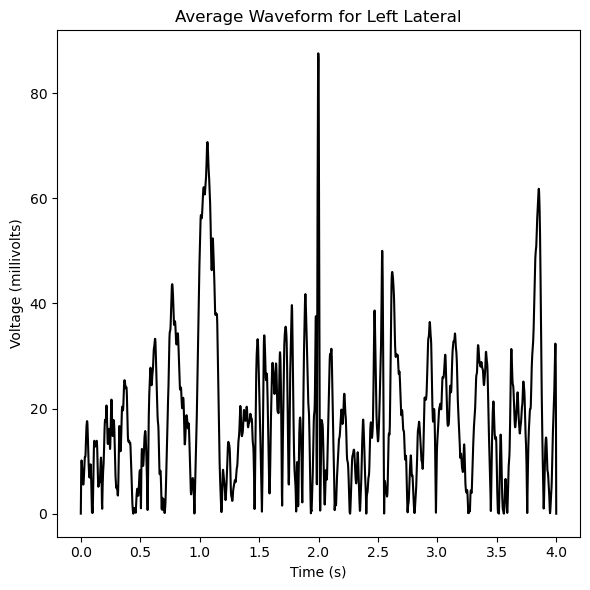

In [83]:
Llat_avgwave_abs = totalavg_roiwave(roiLlat_idxch, roiLlat_vals)
fig = plot_avgroiwave(Llat_avgwave_abs, 'Left Lateral')
fig.savefig("E:/CNT/Interictal_Spike_Analysis/HUMAN/working_feat_extract_code/spike figures/abs_avg_all/Llateral_abs") #save as jpg

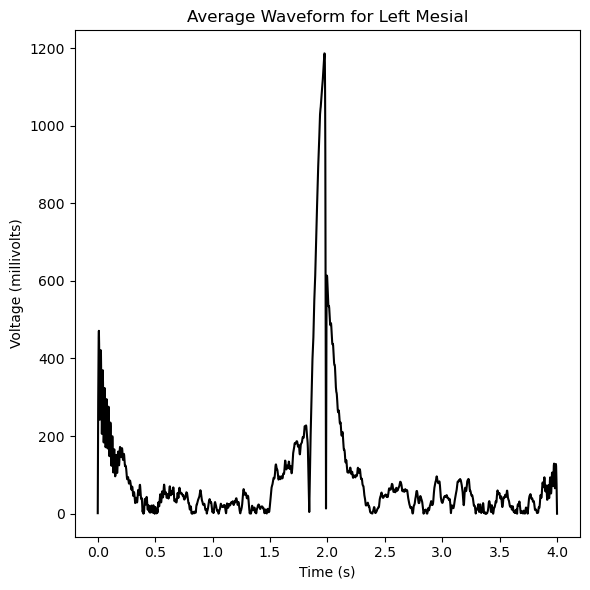

In [84]:
Lmesi_avgwave_abs = totalavg_roiwave(roiLmesi_idxch, roiLmesi_vals)
fig = plot_avgroiwave(Lmesi_avgwave_abs, 'Left Mesial')
fig.savefig("E:/CNT/Interictal_Spike_Analysis/HUMAN/working_feat_extract_code/spike figures/abs_avg_all/Lmesi_abs") #save as jpg